In [1]:


from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D

import numpy as np
from glob import glob

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '../input/indian-currency-notes-classifier/Train'
valid_path = '../input/indian-currency-notes-classifier/Test'

In [3]:
# useful for getting number of output classes
folders = glob('../input/indian-currency-notes-classifier/Train/*')

In [4]:
folders

['../input/indian-currency-notes-classifier/Train/Twentynote',
 '../input/indian-currency-notes-classifier/Train/1Hundrednote',
 '../input/indian-currency-notes-classifier/Train/5Hundrednote',
 '../input/indian-currency-notes-classifier/Train/2Hundrednote',
 '../input/indian-currency-notes-classifier/Train/Tennote',
 '../input/indian-currency-notes-classifier/Train/Fiftynote',
 '../input/indian-currency-notes-classifier/Train/2Thousandnote']

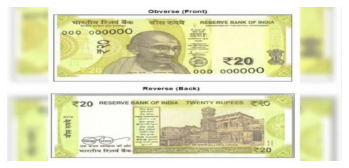

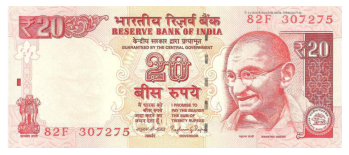

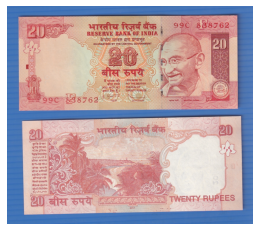

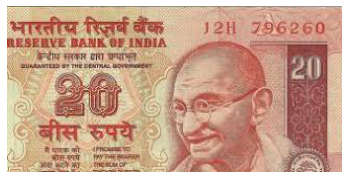

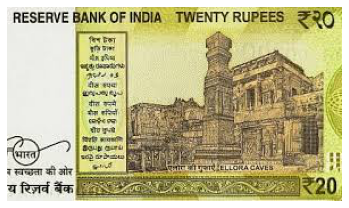

In [5]:
import matplotlib.image as mpimg
from glob import glob
import os
import matplotlib.pyplot as plt
train_image_files = glob(os.path.join(train_path, '*/*.jpg'))

# Display some sample images from the training directory
num_images_to_display = 5
for img_path in train_image_files[:num_images_to_display]:
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [6]:
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_set = datagen.flow_from_directory(train_path, target_size=(IMAGE_SIZE[0], IMAGE_SIZE[1]), batch_size=32, class_mode='categorical')
valid_set = datagen.flow_from_directory(valid_path, target_size=(IMAGE_SIZE[0], IMAGE_SIZE[1]), batch_size=32, class_mode='categorical')

# Load MobileNet model with pre-trained weights, excluding the top (fully connected) layers
base_model = MobileNet(weights='imagenet', include_top=False)

# Add custom top layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
preds = Dense(len(folders), activation='softmax')(x)  # Assuming one node for each class

# Create the model
model = Model(inputs=base_model.input, outputs=preds)

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
hist=model.fit(train_set, validation_data=valid_set, epochs=10, steps_per_epoch=len(train_set), validation_steps=len(valid_set))


Found 153 images belonging to 7 classes.
Found 42 images belonging to 7 classes.
17227776/17225924 [==============================] - 0s 0us/step
Epoch 1/10
5/5 [==============================] - ETA: 0s - loss: 1.9531 - accuracy: 0.2614

/opt/conda/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:780: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


5/5 [==============================] - 18s 4s/step - loss: 1.9531 - accuracy: 0.2614 - val_loss: 1.8441 - val_accuracy: 0.2619
Epoch 2/10
5/5 [==============================] - 17s 3s/step - loss: 1.3735 - accuracy: 0.7908 - val_loss: 1.6976 - val_accuracy: 0.3333
Epoch 3/10
5/5 [==============================] - 17s 3s/step - loss: 0.9722 - accuracy: 0.9085 - val_loss: 1.7346 - val_accuracy: 0.2381
Epoch 4/10
5/5 [==============================] - 17s 3s/step - loss: 0.6111 - accuracy: 0.9608 - val_loss: 1.6632 - val_accuracy: 0.4286
Epoch 5/10
5/5 [==============================] - 17s 3s/step - loss: 0.3195 - accuracy: 0.9869 - val_loss: 1.4541 - val_accuracy: 0.5476
Epoch 6/10
5/5 [==============================] - 18s 4s/step - loss: 0.1726 - accuracy: 0.9869 - val_loss: 1.5468 - val_accuracy: 0.4762
Epoch 7/10
5/5 [==============================] - 17s 3s/step - loss: 0.0927 - accuracy: 1.0000 - val_loss: 1.5337 - val_accuracy: 0.5714
Epoch 8/10
5/5 [=============================

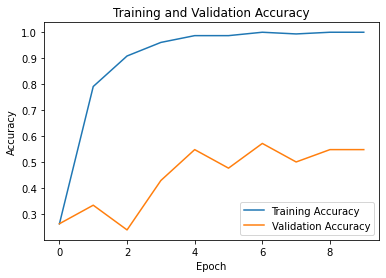

In [7]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
model.save("fake_currrecy_detection.h5")

In [9]:
# Load the saved model
import tensorflow as tf

loaded_model = tf.keras.models.load_model('/kaggle/working/fake_currrecy_detection.h5')



In [10]:
test_image_path = '/kaggle/input/indian-currency-notes-classifier/Test/1Hundrednote/1.jpg'  # Change this to the path of your test image

# Load the test image
test_img = image.load_img(test_image_path, target_size=IMAGE_SIZE)
test_img_array = image.img_to_array(test_img)
test_img_array = np.expand_dims(test_img_array, axis=0)  # Add batch dimension

# Normalize the image data
test_img_array = test_img_array / 255.0

# Make prediction
predictions = loaded_model.predict(test_img_array)

# Class labels
class_labels = ['Fake', 'Real']

# Get the predicted class label
predicted_class_index = np.argmax(predictions[0])
predicted_class_label = class_labels[predicted_class_index]

print("Predicted class:", predicted_class_label)

Predicted class: Fake


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define the CNN model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    #Conv2D(128, (3, 3), activation='relu'),
    #MaxPooling2D((2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification: Fake or Real
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

# Train the model
history = model.fit(train_set, epochs=5, validation_data=valid_set)

# Save the trained model
model.save("cnn_model.h5")


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 93312)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               11197560  
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1

In [12]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False)

# Add custom classification layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Combine the base model with custom classification layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_set, epochs=5, validation_data=valid_set)

# Save the trained model
model.save("resnet_model.h5")


94773248/94765736 [==============================] - 1s 0us/step
Epoch 1/5
5/5 [==============================] - 16s 3s/step - loss: 0.4668 - accuracy: 0.8571 - val_loss: 0.4133 - val_accuracy: 0.8571
Epoch 2/5
5/5 [==============================] - 16s 3s/step - loss: 0.4276 - accuracy: 0.8571 - val_loss: 0.4223 - val_accuracy: 0.8571
Epoch 3/5
5/5 [==============================] - 15s 3s/step - loss: 0.4233 - accuracy: 0.8571 - val_loss: 0.4121 - val_accuracy: 0.8571
Epoch 4/5
5/5 [==============================] - 16s 3s/step - loss: 0.4158 - accuracy: 0.8571 - val_loss: 0.4115 - val_accuracy: 0.8571
Epoch 5/5
5/5 [==============================] - 16s 3s/step - loss: 0.4142 - accuracy: 0.8571 - val_loss: 0.4103 - val_accuracy: 0.8571


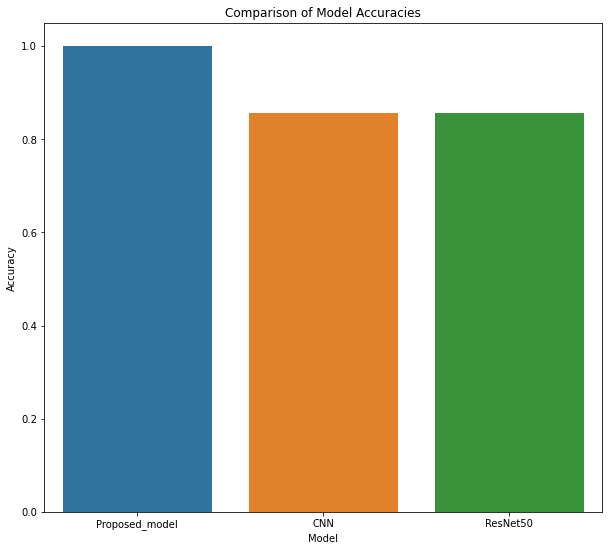

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract accuracies from the training history of each model
mobile_acc = hist.history['accuracy'][-1]  # Taking the final accuracy value
cnn_acc = history.history['accuracy'][-1]  # Taking the final accuracy value
resnet_acc = history.history['accuracy'][-1]  # Taking the final accuracy value

# Create a DataFrame
data = {
    'Model': ['Proposed_model', 'CNN', 'ResNet50'],
    'Accuracy': [mobile_acc, cnn_acc, resnet_acc]
}

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 9))  # Increase plot size
sns.barplot(x='Model', y='Accuracy', data=data)

# Add title and labels
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')


plt.show()
